In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters

In [37]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [38]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,153736,153840,153962,153982,153990,154094,154180,154283,154361,154487
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,153318,154316,155293,156162,157026,157436,158431,159423,160365,161324
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,198962,199275,199560,199822,200068,200301,200528,200770,200989,201224
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,15070,15078,15083,15083,15083,15096,15099,15108,15113,15124
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,49349,49628,49943,50348,50446,50738,51047,51407,51827,52208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,563676,576096,589417,601349,613375,624547,635055,645640,656129,667650
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,361881,364364,366675,368160,369761,372108,374768,377134,379635,381854
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,8230,8267,8306,8358,8414,8452,8502,8527,8557,8593
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,207442,207560,207696,207836,207938,207960,208049,208161,208267,208353


In [39]:
df = df.iloc[:, 4:]
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21,9/15/21,9/16/21,9/17/21
0,0,0,0,0,0,0,0,0,0,0,...,153736,153840,153962,153982,153990,154094,154180,154283,154361,154487
1,0,0,0,0,0,0,0,0,0,0,...,153318,154316,155293,156162,157026,157436,158431,159423,160365,161324
2,0,0,0,0,0,0,0,0,0,0,...,198962,199275,199560,199822,200068,200301,200528,200770,200989,201224
3,0,0,0,0,0,0,0,0,0,0,...,15070,15078,15083,15083,15083,15096,15099,15108,15113,15124
4,0,0,0,0,0,0,0,0,0,0,...,49349,49628,49943,50348,50446,50738,51047,51407,51827,52208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,2,2,2,2,2,2,2,2,2,...,563676,576096,589417,601349,613375,624547,635055,645640,656129,667650
275,0,0,0,0,0,0,0,0,0,0,...,361881,364364,366675,368160,369761,372108,374768,377134,379635,381854
276,0,0,0,0,0,0,0,0,0,0,...,8230,8267,8306,8358,8414,8452,8502,8527,8557,8593
277,0,0,0,0,0,0,0,0,0,0,...,207442,207560,207696,207836,207938,207960,208049,208161,208267,208353


In [40]:
daily_global = df.sum(axis=0)

In [41]:
daily_global.index = pd.to_datetime(daily_global.index)

In [42]:
daily_global

2020-01-22          557
2020-01-23          655
2020-01-24          941
2020-01-25         1433
2020-01-26         2118
                ...    
2021-09-13    225366201
2021-09-14    225915368
2021-09-15    226478640
2021-09-16    227056250
2021-09-17    227649349
Length: 605, dtype: int64

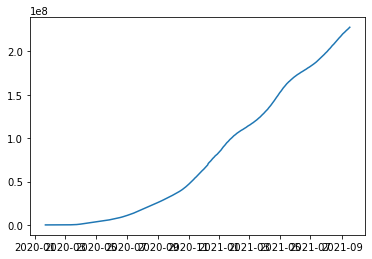

In [43]:
plt.plot(daily_global)

In [44]:
y = daily_global.values.astype(float)

In [45]:
test_size = 3
train_original_data = y[:-test_size]
test_original_data = y[-test_size:]

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

In [48]:
train_normalized = scaler.fit_transform(train_original_data.reshape(-1,1))
train_normalized.shape

(602, 1)

In [49]:
train_normalized = torch.FloatTensor(train_normalized).view(-1)
window_size = 3

In [50]:
def sequence_creator(input_data, window):
    dataset = []
    data_len = len(input_data)
    for i in range(data_len - window):
        window_fr = input_data[i:i+window]
        label = input_data[i+window:i+window+1]
        dataset.append((window_fr, label))
    return dataset

In [51]:
train_data = sequence_creator(train_normalized, window_size)

In [52]:
class LSTM_Corona(nn.Module):
    def __init__(self, in_size=1, h_size=30, out_size=1):
        super().__init__()
        self.h_size = h_size
        self.lstm = nn.LSTM(in_size, h_size)
        self.fc = nn.Linear(h_size, out_size)

        self.hidden = (torch.zeros(1, 1, h_size), torch.zeros(1, 1, h_size))

    def forward(self, sequence_data):
        lstm_out, self.hidden = self.lstm(sequence_data.view(len(sequence_data), 1, -1), self.hidden)
        pred = self.fc(lstm_out.view(len(sequence_data), -1))

        return pred[-1]

In [53]:
torch.manual_seed(3)
model = LSTM_Corona()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [56]:
epochs = 100

for epoch in range(epochs):
    for sequence_in, y_train in train_data:
        y_pred = model(sequence_in)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.h_size), torch.zeros(1, 1, model.h_size))

        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1} loss {loss.item():.4f}')

Epoch 1 loss 0.0001
Epoch 2 loss 0.0001
Epoch 3 loss 0.0002
Epoch 4 loss 0.0002
Epoch 5 loss 0.0001
Epoch 6 loss 0.0000
Epoch 7 loss 0.0000
Epoch 8 loss 0.0000
Epoch 9 loss 0.0000
Epoch 10 loss 0.0000
Epoch 11 loss 0.0000
Epoch 12 loss 0.0000
Epoch 13 loss 0.0000
Epoch 14 loss 0.0000
Epoch 15 loss 0.0000
Epoch 16 loss 0.0000
Epoch 17 loss 0.0000
Epoch 18 loss 0.0000
Epoch 19 loss 0.0000
Epoch 20 loss 0.0000
Epoch 21 loss 0.0000
Epoch 22 loss 0.0000
Epoch 23 loss 0.0000
Epoch 24 loss 0.0000
Epoch 25 loss 0.0000
Epoch 26 loss 0.0000
Epoch 27 loss 0.0000
Epoch 28 loss 0.0000
Epoch 29 loss 0.0000
Epoch 30 loss 0.0000
Epoch 31 loss 0.0000
Epoch 32 loss 0.0000
Epoch 33 loss 0.0000
Epoch 34 loss 0.0000
Epoch 35 loss 0.0000
Epoch 36 loss 0.0000
Epoch 37 loss 0.0000
Epoch 38 loss 0.0000
Epoch 39 loss 0.0000
Epoch 40 loss 0.0000
Epoch 41 loss 0.0000
Epoch 42 loss 0.0000
Epoch 43 loss 0.0000
Epoch 44 loss 0.0000
Epoch 45 loss 0.0000
Epoch 46 loss 0.0000
Epoch 47 loss 0.0000
Epoch 48 loss 0.0000
E

In [55]:
test = 3

preds = train_normalized[-window_size:].tolist()

model.eval()

for i in range(test):
    sequence = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.h_size), torch.zeros(1, 1, model.h_size))
        preds.append(model(sequence).item())


In [57]:
predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

In [58]:
predictions

array([[2.26555575e+08],
       [2.27042032e+08],
       [2.27501047e+08]])

In [59]:
daily_global[-3:]

2021-09-15    226478640
2021-09-16    227056250
2021-09-17    227649349
dtype: int64

In [60]:
x = np.arange('2021-09-15', '2021-09-18', dtype='datetime64[D]').astype('datetime64[D]')
x

array(['2021-09-15', '2021-09-16', '2021-09-17'], dtype='datetime64[D]')

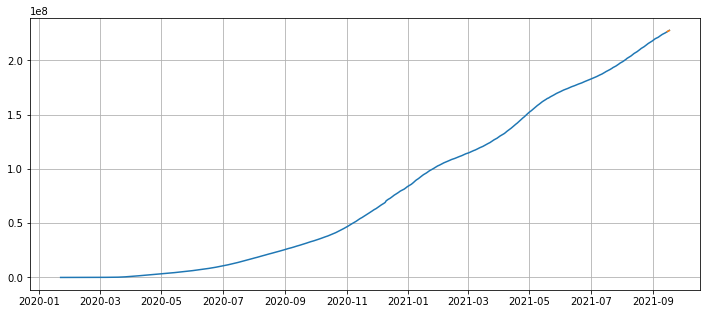

In [61]:
plt.figure(figsize=(12, 5))
plt.grid(True)
plt.plot(daily_global)
plt.plot(x, predictions)
plt.show()

In [63]:
epochs = 200
model.train()

y_normalized = scaler.fit_transform(y.reshape(-1, 1))
y_normalized = torch.FloatTensor(y_normalized).view(-1)
full_data = sequence_creator(y_normalized, window_size)

In [64]:
for epoch in range(epochs):
    for sequence_in, y_train in full_data:

        y_pred = model(sequence_in)
        loss = criterion(y_pred, y_train)

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.h_size), torch.zeros(1, 1, model.h_size))

        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1} Loss {loss.item():.4f}')

Epoch 1 Loss 0.0000
Epoch 2 Loss 0.0000
Epoch 3 Loss 0.0000
Epoch 4 Loss 0.0000
Epoch 5 Loss 0.0000
Epoch 6 Loss 0.0000
Epoch 7 Loss 0.0000
Epoch 8 Loss 0.0000
Epoch 9 Loss 0.0000
Epoch 10 Loss 0.0000
Epoch 11 Loss 0.0000
Epoch 12 Loss 0.0000
Epoch 13 Loss 0.0000
Epoch 14 Loss 0.0000
Epoch 15 Loss 0.0000
Epoch 16 Loss 0.0000
Epoch 17 Loss 0.0000
Epoch 18 Loss 0.0000
Epoch 19 Loss 0.0000
Epoch 20 Loss 0.0000
Epoch 21 Loss 0.0000
Epoch 22 Loss 0.0000
Epoch 23 Loss 0.0000
Epoch 24 Loss 0.0000
Epoch 25 Loss 0.0000
Epoch 26 Loss 0.0000
Epoch 27 Loss 0.0000
Epoch 28 Loss 0.0000
Epoch 29 Loss 0.0000
Epoch 30 Loss 0.0000
Epoch 31 Loss 0.0000
Epoch 32 Loss 0.0000
Epoch 33 Loss 0.0000
Epoch 34 Loss 0.0000
Epoch 35 Loss 0.0000
Epoch 36 Loss 0.0000
Epoch 37 Loss 0.0000
Epoch 38 Loss 0.0000
Epoch 39 Loss 0.0000
Epoch 40 Loss 0.0000
Epoch 41 Loss 0.0000
Epoch 42 Loss 0.0000
Epoch 43 Loss 0.0000
Epoch 44 Loss 0.0000
Epoch 45 Loss 0.0000
Epoch 46 Loss 0.0000
Epoch 47 Loss 0.0000
Epoch 48 Loss 0.0000
E

In [65]:
future = 3

preds = y_normalized[-window_size:].tolist()

model.eval()

for i in range(future):
    sequence = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.h_size), torch.zeros(1, 1, model.h_size))
        preds.append(model(sequence).item())

predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))

x = np.arange('2021-09-18', '2021-09-21', dtype='datetime64[D]').astype('datetime64[D]')

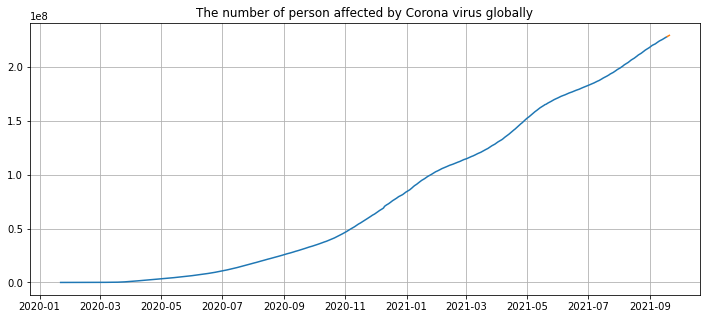

In [66]:
plt.figure(figsize=(12, 5))
plt.title('The number of person affected by Corona virus globally')
plt.grid(True)
plt.plot(daily_global)
plt.plot(x, predictions[window_size:])

In [67]:
predictions

array([[2.26478642e+08],
       [2.27056251e+08],
       [2.27649349e+08],
       [2.28147966e+08],
       [2.28675730e+08],
       [2.29191579e+08]])